# Test Predict

In [4]:
import pandas as pd
import os

In [5]:
  #choose gpu on processing 
os.environ["CUDA_VISIBLE_DEVICES"]="0" # second gpu  

In [9]:
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/detail1_350_.csv')
df01 = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
# select data 
# df02 = df01.loc[(df01['Abs Position']  == 'P1' ) | (df01['Abs Position']  == 'P2')]
df02 = df01.loc[df01['Abs Position']  != 'P8' ]

In [10]:
a = df02[df02['Case'].between(1, 10)]
print(a.shape)
print('Normal: ',a[a['Class']=='Normal'].shape)
print('Abnormal: ',a[a['Class']=='Abnormal'].shape)
# a1 = a['Path Crop'].tolist() 
# a1[0]

(405, 8)
Normal:  (115, 8)
Abnormal:  (290, 8)


### Load model

In [1]:
import sys
sys.path.append('/media/tohn/SSD/Nor_ABnor_Network/content/efficientnet_keras_transfer_learning')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

Using TensorFlow backend.


In [2]:
#load model 
from tensorflow.keras.models import load_model
model = load_model("/media/tohn/SSD/Nor_ABnor_Network/content/efficientnet_keras_transfer_learning/models/ABn_vs_Nor.h5")

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1280)              4049564   
_________________________________________________________________
fc_out (Dense)               (None, 1)                 1281      
Total params: 4,050,845
Trainable params: 782,721
Non-trainable params: 3,268,124
_________________________________________________________________


### Prediction

In [11]:
width = 150 
height = 150 
input_shape = (height, width, 3) #ขนาด image enter

In [12]:
from tensorflow.keras.preprocessing import image
import pandas as pd

In [13]:
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])[0][0]
    if result > 0.5:
        classs = "Normal"
    else:
        classs = "Abnormal"
        result = 1 - result
    return classs,result

In [14]:
classe =['Normal','Abnormal']
results = list()
# predlist,problist = list(), list()

for i in classe:
    img_path =a[a['Class']==i]['Path Crop'].tolist()
    for j in img_path:
        classs,result = predict_image(j)
        results.append({'2Actual':i,'3Predicted':classs, '4Class_prob':result,'path':j})

In [15]:
result = pd.DataFrame(results)
result

,2Actual,3Predicted,4Class_prob,path
0,Normal,Normal,0.999849,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
1,Normal,Normal,0.999999,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
2,Normal,Normal,0.999965,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
3,Normal,Normal,1.000000,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
4,Normal,Normal,1.000000,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
5,Normal,Normal,0.999999,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
6,Normal,Normal,1.000000,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
7,Normal,Normal,1.000000,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
8,Normal,Normal,0.999799,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
9,Normal,Normal,0.999815,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...


In [16]:
# os.chdir( '/home/yupaporn/codes/USAI/')
# result.to_csv('predict_all.csv')

# Visualization

In [17]:
data_train = result

In [18]:
#เช็คคลาสใน Predicted
pred_class = set(data_train['3Predicted'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['2Actual'])
print('Actual : ',len(classe))
print(classe)

Predicted :  2
{'Abnormal', 'Normal'}
Actual :  2
{'Abnormal', 'Normal'}


In [19]:
act = data_train['2Actual'].array
pred = data_train['3Predicted'].array

In [20]:
classes =['Abnormal', 'Normal']

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(act, pred, classes)
# print('fan classifier accuracy = {}%'.format((100.*numpy.trace(cmat))/(numpy.sum(cmat))))
print('fan classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

fan classifier accuracy = 91.60493827160494%


/home/yupaporn/miniconda3/envs/eff/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [22]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))#performance

              precision    recall  f1-score   support

    Abnormal       1.00      0.88      0.94       290
      Normal       0.77      1.00      0.87       115

    accuracy                           0.92       405
   macro avg       0.89      0.94      0.90       405
weighted avg       0.94      0.92      0.92       405



In [23]:
data = {'Predicted' : pred, 'Actual': act}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Predicted'],df['Actual'],rownames=['Predicted'],colnames=['Actual'])
conf_mat

Actual,Abnormal,Normal
Predicted,,
Abnormal,256,0
Normal,34,115


Text(48.5, 0.5, 'Predicted label')

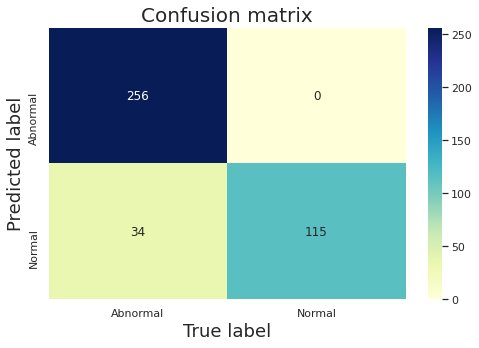

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_xlabel('True label',fontsize=18)
ax.set_ylabel('Predicted label',fontsize=18)